In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Complete Case Analysis:</h3>

Also know as **"list-wise delection"**.

Complete Case Analysis (CCA) is a method used in statistics and machine learning to handle missing data. It involves analyzing only the cases (rows) in a dataset that have complete information, meaning no missing values in the variables of interest.

**Key Points**

*   If any value in a row is missing, that entire row is removed from the analysis.
*   The remaining data (with no missing values) is used for modeling or statistical analysis.

* The data is removed only when the rows are random. e.g you cant remove first 50rows or mid 50rows etc.

* The distribution before and after removing data must not be compeletly different

**When to Use**

* MCAR
* <5%







In [89]:
df = pd.read_csv('/content/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [90]:
df.isnull().sum()*100/len(df)

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [91]:
cols = []
for i in df.columns:
  if df[i].isnull().mean()*100 < 5 and df[i].isnull().mean()*100 > 0:
    cols.append(i)

In [92]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [93]:
len(df.dropna(subset=cols))/ len(df)

0.8968577095730244

In [94]:
df_clean = df.dropna(subset=cols)

df_clean.shape, df.shape

((17182, 13), (19158, 13))

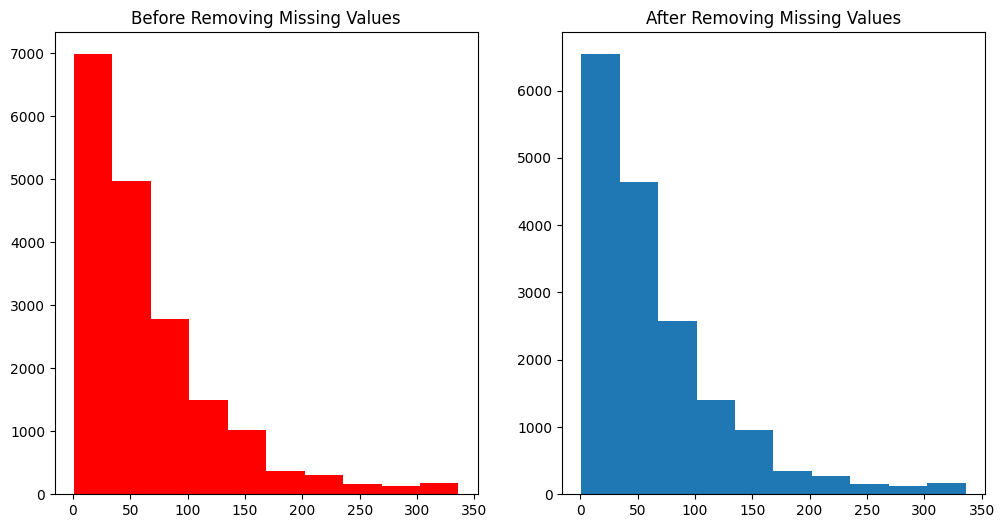

In [95]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(df['training_hours'], bins=10, color='red')
plt.title("Before Removing Missing Values")

plt.subplot(122)
plt.hist(df_clean['training_hours'],bins=10)
plt.title("After Removing Missing Values")

plt.show()

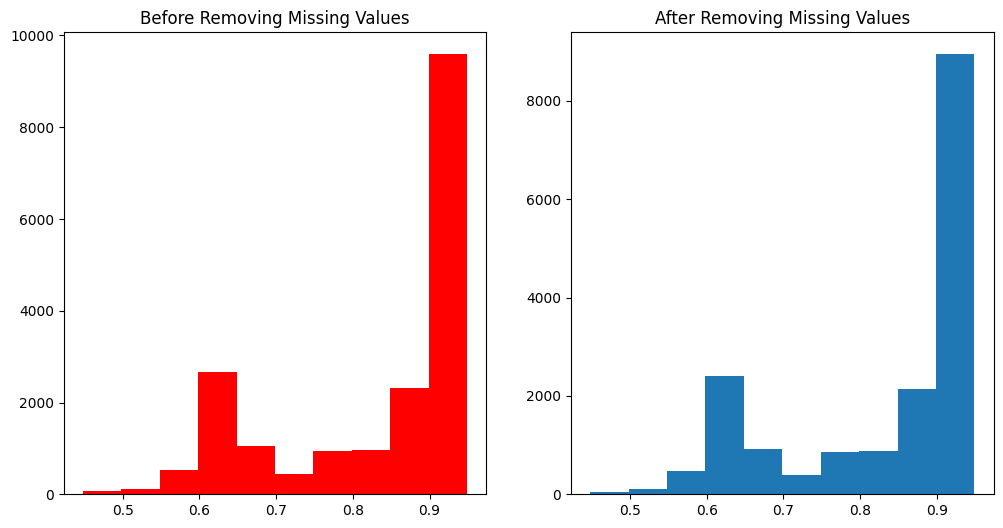

In [96]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(df['city_development_index'], bins=10, color='red')
plt.title("Before Removing Missing Values")

plt.subplot(122)
plt.hist(df_clean['city_development_index'],bins=10)
plt.title("After Removing Missing Values")

plt.show()

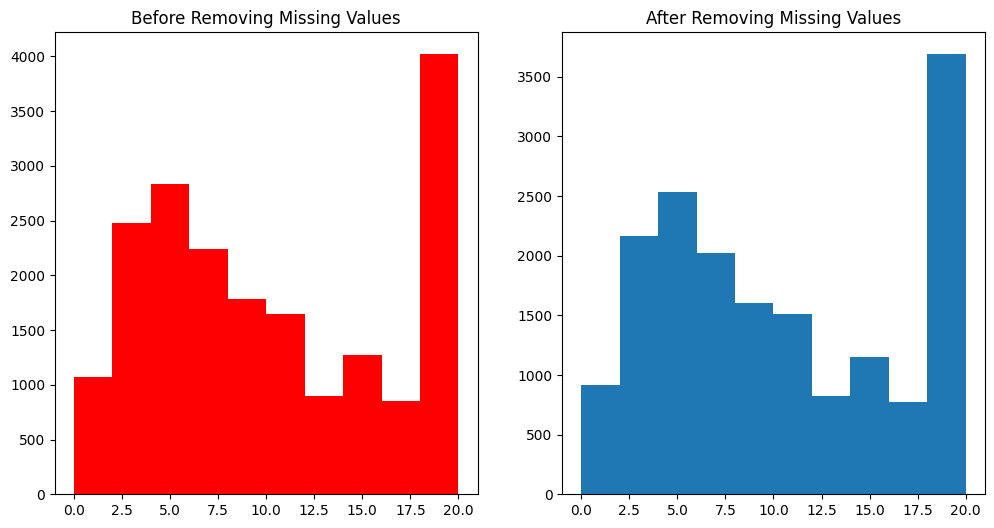

In [97]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(df['experience'], bins=10, color='red')
plt.title("Before Removing Missing Values")

plt.subplot(122)
plt.hist(df_clean['experience'],bins=10)
plt.title("After Removing Missing Values")

plt.show()